In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Create a model

In [2]:
# class 1
x1 = np.random.normal(25, 5, 1000)
y1 = np.random.normal(25, 5, 1000)

# class 2
x2 = np.random.normal(55, 5, 1000)
y2 = np.random.normal(60, 5, 1000)

# class 3
x3 = np.random.normal(55, 5, 1000)
y3 = np.random.normal(15, 5, 1000)

X = np.concatenate((x1, x2, x3), axis = 0)
Y = np.concatenate((y1, y2, y3), axis = 0)

In [3]:
dictionary = {"x":X, "y":Y}
data = pd.DataFrame(dictionary)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       3000 non-null   float64
 1   y       3000 non-null   float64
dtypes: float64(2)
memory usage: 47.0 KB


## Visualization

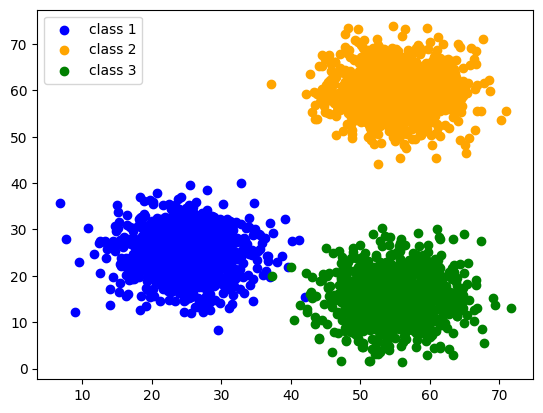

In [4]:
plt.scatter(x1, y1, color = "blue", label = "class 1")
plt.scatter(x2, y2, color = "orange", label = "class 2")
plt.scatter(x3, y3, color = "green", label = "class 3")
plt.legend()
plt.show()

## Dendrogram 

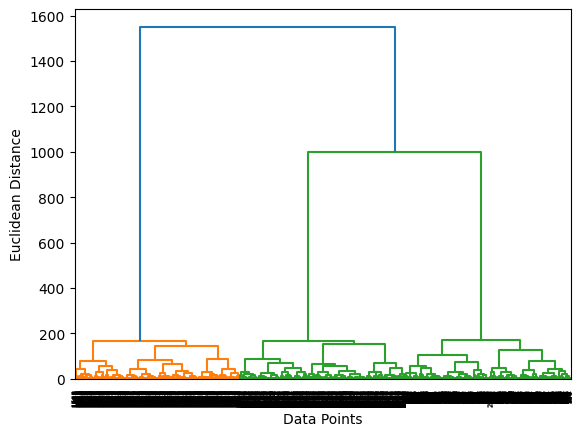

In [14]:
from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(data, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Hierarchical Clustering Application

In [16]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean", linkage = "ward") 
"""
From Dendrogram, we defined our cluster value is 3.
Ward method makes as much as minimum variation in the clusters
"""

'\nFrom Dendrogram, we defined our cluster value is 3.\nWard method makes as much as minimum variation in the clusters\n'

In [18]:
cluster = hc.fit_predict(data)
data["label"] = cluster
data.label.unique()

C:\Users\ardau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 2, 1], dtype=int64)

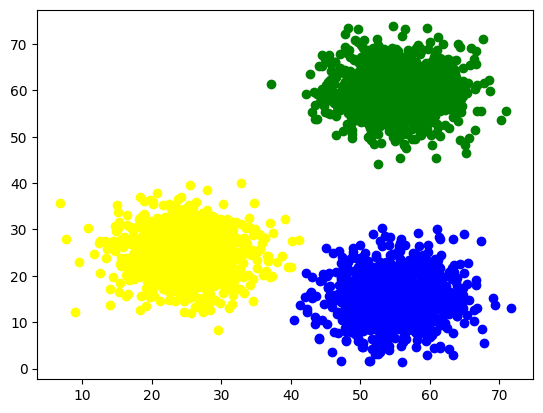

In [20]:
# visualize labeled data
plt.scatter(data.x[data["label"] == 0], data.y[data["label"] == 0], color = "yellow")
plt.scatter(data.x[data["label"] == 1], data.y[data["label"] == 1], color = "green")
plt.scatter(data.x[data["label"] == 2], data.y[data["label"] == 2], color = "blue")
plt.show()